In [1]:
import os
falling_dir=os.path.join('./Dataset/training/falling')
sitting_dir=os.path.join('./Dataset/training/sitting')
standing_dir=os.path.join('./Dataset/training/standing')
print('Total training falling images:', len(os.listdir(falling_dir)))
print('Total training sitting images:', len(os.listdir(sitting_dir)))
print('Total training standing images:', len(os.listdir(standing_dir)))
falling_files=os.listdir(falling_dir)
sitting_files=os.listdir(sitting_dir)
standing_files=os.listdir(standing_dir)

Total training falling images: 101
Total training sitting images: 100
Total training standing images: 100


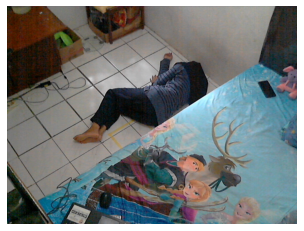

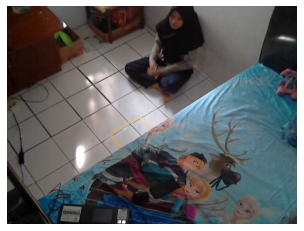

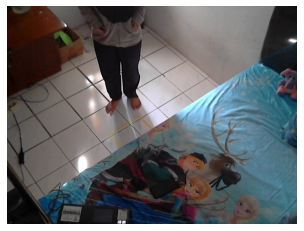

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
pic_index = 1

next_falling=[os.path.join(falling_dir, fname) for fname in falling_files[pic_index-1:pic_index]]
next_sitting=[os.path.join(sitting_dir, fname) for fname in sitting_files[pic_index-1:pic_index]]
next_standing=[os.path.join(standing_dir, fname) for fname in standing_files[pic_index-1:pic_index]]

#show the pict in the folder
for i, img_path in enumerate(next_falling+next_sitting+next_standing):
    img=mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

(480, 640, 3) <dtype: 'float32'>


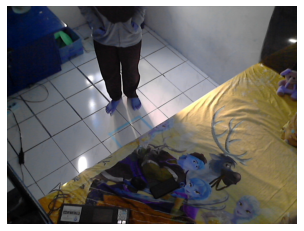

In [3]:
import tensorflow_io as tfio
bgr = tfio.experimental.color.rgb_to_bgr(img)

print(bgr.shape, bgr.dtype)

plt.figure()
plt.imshow(bgr)
plt.axis('off')
plt.show()

In [ ]:
# Training parameters
epochs = 15
num_classes = 3
classes = ['falling', 'sitting', 'standing']

# Input image dimensions
img_rows, img_cols = 480, 640

# Extract the data
train_path = "./Dataset/training/"
validation_path = "./Dataset/validation/"
validation_samples = 107
batch_size = 16
total_samples = 528

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRINING_DIR="./Dataset/training/"
training_datagen=ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

VALIDATION_DIR = "./Dataset/validation/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("fall-detection.h5")
